In [1]:
import pandas as pd
import numpy as np
from Bio.Seq import Seq
import matplotlib.pyplot as plt

In [2]:
#現在の最大表示行数の出力
pd.set_option("display.max_rows",5000)
#カラム内の文字数。デフォルトは50だった
pd.set_option("display.max_colwidth", 80)

In [3]:
pwd()

'C:\\Users\\tamon\\Desktop\\RBS\\jupyter'

In [4]:
#データ読み込み
input_R1= pd.read_csv('../raw_data/200714/in_S1_L001_R1_001.fastq',header=None)
input_R2= pd.read_csv('../raw_data/200714/in_S1_L001_R2_001.fastq',header=None)
output_R1= pd.read_csv('../raw_data/200714/out_S2_L001_R1_001.fastq',header=None)
output_R2= pd.read_csv('../raw_data/200714/out_S2_L001_R2_001.fastq',header=None)

input_R1.head(12)

,0
0,@M01347:246:000000000-J8JP8:1:1101:15530:1342 1:N:0:1
1,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAAGTCATTAAA...
2,+
3,AAAAAF1D1DFFGGGGBGDG3F1EE0EEFF1BFFGHBGHBFBFACFEFDB1FGFHECG/E0BFBE@//?1BDGHF1...
4,@M01347:246:000000000-J8JP8:1:1101:15584:1352 1:N:0:1
5,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
6,+
7,AAAA11BD1BFFFDGCGGGGGGGGAEAEHFHGFFHHHHHHHCHGFHHGHHHHEAFEEEGGHHHHEEEGHGHHHHHH...
8,@M01347:246:000000000-J8JP8:1:1101:16314:1373 1:N:0:1
9,GGATACAATTGACATTGTGAGCGGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGA...


In [5]:
input_R1.to_csv('../input/input_R1.csv', index=False)

In [6]:
#配列のみをそれぞれ取り出す
def Sequence(x):
    x_data = x[1:len(x)+1:4].reset_index()
    x_data = x_data.drop('index',axis=1)
    x_data = x_data.rename(columns={0:'seq'})
    
    return x_data

input_R1_data = Sequence(input_R1)
input_R2_data = Sequence(input_R2)
output_R1_data = Sequence(output_R1)
output_R2_data = Sequence(output_R2)

In [7]:
output_R2_data

,seq
0,AGAGCCGAATAGCCTCTCCACCCACGCGGCCGGAGAACCTGCGTGCAATCCATCTTGTTCAATCATGGGACCTTAC...
1,ATAGCCGAATAGCCTCTCCACCCAAGCGGCCGGAGAACCTGCGTGCAATCCATCTTGTTCAATCATGGTACCTTGC...
2,ATAGCCGAATAGCCTCTCCACCCAAGCGGCCGGAGAACCTGCGTGCAATCCATCTTGTTCAATCATGGTACCTCAA...
3,TATTTTAAAGCGCCGTGGATGCCTGACCGTACCGAGGCTAACCCTAATGAGCTTAATCAAGATGATGCTCGTTATG...
4,ATAGCCGAATAGCCTCTCCACCCAAGCGGCCGGAGAACCTGCGTGCAATCCATCTTGTTCAATCATGGTACCTTCG...
...,...
1950078,ATAGGCGAATAGCCTCTCCACCCAAGCGGCCGGAGAACCTGCGTGCAATCCATCTTGTTCAATCATGGTACCTTAA...
1950079,TGAATATTAGACATAATTTATCCTCAAGTAAGGGGCCGAAGCCCCTGCAATTAAAATTGTTGACCACCTACATACC...
1950080,AATTCGTAAACAAGCAGTAGTAATTCCTGCTTTAGCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTT...
1950081,GGAGCAGTCCAAATGCTTTTGAGATGACAGCAACGGAAACCATAACGAGCATCATCTTGATTAAGCTCATTAGGGT...


In [8]:
# # 一番biopythonを使う
# # DNAでもRNAでも使える
# from Bio.Seq import Seq

# seq='ATGCatgc--Nn'
# seq_c=str(Seq(seq).reverse_complement())

# print(seq_c)

In [9]:
#BioPythonでR2を相補鎖にする(相補鎖にして逆にする)
input_R2_data['seq_comp'] = input_R2_data['seq'].map(lambda x:str(Seq(x).reverse_complement()))
output_R2_data['seq_comp'] = output_R2_data['seq'].map(lambda x:str(Seq(x).reverse_complement()))

#seqカラムを消去
comp_in_R2 = input_R2_data.drop('seq',axis=1)
comp_out_R2 = output_R2_data.drop('seq',axis=1)

In [10]:
input_R1_data.head()

,seq
0,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAAGTCATTAAA...
1,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
2,GGATACAATTGACATTGTGAGCGGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGA...
3,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
4,GGATAACAATTGACATTATGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCGTACCA...


In [11]:
output_R1_data.head()

,seq
0,TGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
1,GGATAACTATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
2,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...
3,GTTCCATCAACATCATAGCCAGATGCCCAGAGATTAGAGCGCATGACAAGTAAAGGACGGTTGTCAGCGTCATAAG...
4,GGATAACAATTGACATTGTGAGCGGATAACAAGATACTGAGCACATCAGCAGGACGCACTGACCGAATTCATTAAA...


In [12]:
#RBS配列を取り出す
def Index(x,pre_seq):
    index = str(x).find(pre_seq)
    
    return index

def RBS(seq,clumns):
    pre_seq = 'ATTAAAG'
    seq['rbs_seq'] = seq[clumns].map(lambda x:str(x)[Index(x,pre_seq)+len(pre_seq):Index(x,pre_seq)+len(pre_seq)+7])
    seq = seq.drop(clumns,axis=1)
    
    return seq

input_R1_rbs = RBS(input_R1_data,'seq')
input_R2_rbs = RBS(comp_in_R2,'seq_comp') 
output_R1_rbs = RBS(output_R1_data,'seq') 
output_R2_rbs = RBS(comp_out_R2,'seq_comp') 

In [13]:
output_R2_rbs

,rbs_seq
0,GTTGGTA
1,ACGGGCA
2,ATCGTTG
3,GGCGAGA
4,GAGACGA
...,...
1950078,TACATTA
1950079,CTGGCGC
1950080,GCGCGCT
1950081,TTCAGGG


In [14]:
#columnsの名前を変える
input_R1_rbs.rename(columns={'rbs_seq':'in_R1_rbs'},inplace=True)
input_R2_rbs.rename(columns={'rbs_seq':'in_R2_rbs'},inplace=True)
output_R1_rbs.rename(columns={'rbs_seq':'out_R1_rbs'},inplace=True)
output_R2_rbs.rename(columns={'rbs_seq':'out_R2_rbs'},inplace=True)

In [15]:
#R1,R2の共通の配列を取り出す
input_rbs = pd.concat([input_R1_rbs,input_R2_rbs],axis=1)
output_rbs = pd.concat([output_R1_rbs,output_R2_rbs],axis=1)

input_rbs = input_rbs['in_R1_rbs'][input_rbs['in_R1_rbs'] == input_rbs['in_R2_rbs']].reset_index().drop('index',axis=1)
output_rbs = output_rbs['out_R1_rbs'][output_rbs['out_R1_rbs'] == output_rbs['out_R2_rbs']].reset_index().drop('index',axis=1)

In [16]:
output_rbs

,out_R1_rbs
0,GTTGGTA
1,ACGGGCA
2,ATCGTTG
3,GAGACGA
4,CCTTTTG
...,...
1497209,TATACAG
1497210,GTGTGTT
1497211,GGCAATC
1497212,ATGCGGA


In [17]:
#in,outの読み取り回数取得
input_count = input_rbs.value_counts()
output_count = output_rbs.value_counts()

input_count_data = pd.DataFrame(input_count)
output_count_data = pd.DataFrame(output_count)

count = pd.concat([input_count_data,output_count_data],axis=1)
count.columns = ['in','out']

count.dropna(inplace=True)

#翻訳効率を出す
count['translation_rate'] = count.apply(lambda x:np.log2(x['out']/x['in']),axis=1)
count = count.rename_axis('seq').reset_index()

count = count[(-2 <= count['translation_rate']) & (count['translation_rate'] <= 4)]

count = count[count['in'] >= 80]

# np.log2

In [18]:
print(count.shape)
count['bin'] = pd.cut(count['translation_rate'],12,labels= [i+1 for i in range(12)])
count['bin'].value_counts()

(2031, 4)


5     627
4     522
6     321
3     190
7     115
8      69
9      55
10     46
2      41
11     22
1      16
12      7
Name: bin, dtype: int64

In [19]:
pwd()

'C:\\Users\\tamon\\Desktop\\RBS\\jupyter'

In [20]:
# from sklearn.preprocessing import MinMaxScaler
# data = count['translation_rate']
# arr = np.array(data).reshape(-1,1)

# # 範囲指定してスケーリングする場合
# sc_min = 0
# sc_max = 10
# scaler = MinMaxScaler( (sc_min, sc_max) )
# scaler.fit(arr)
# data_scaled = scaler.transform(arr)

# count['translation_rate'] = data_scaled

In [21]:
# def remove_ATG(x):
#     if 'ATG' in str(x):
#         return 0
#     else:
#         return str(x)
    
# count['seq'] = count['seq'].map(remove_ATG)    
# count = count[count['seq']!='0']

In [22]:
# def remove_GGG(x):
#     if 'GGG' in str(x):
#         return 0
#     else:
#         return str(x)
    
# count['seq'] = count['seq'].map(remove_GGG)    
# count = count[count['seq']!=0]

In [23]:
count
count.shape

(2031, 5)

In [24]:
# pre_seq = 'TAAAG'
# behind_seq = 'AGG'

In [25]:
# count['seq'] = pre_seq + count['seq'] + behind_seq
# count.head(3)

In [26]:
# def ATG(x):
#     a = str(x).find('ATG')
#     return str(x)[a-14:a-7]

# train['seq'] = train['seq'].map(ATG)
# train.head()

In [27]:
pre_seq = 'ATCAGCAGGACGCACTGACCGAATTCAT'
behind_seq = 'TACCATGATTG'

In [28]:
pre_seq = 'TAAAG'
behind_seq = 'AGG'
count['seq'] = pre_seq + count['seq'] + behind_seq
count.head(3)

,seq,in,out,translation_rate,bin
2,TAAAGAAAAAGAAGG,110.0,305.0,1.471306,8
4,TAAAGAAAACACAGG,189.0,357.0,0.917538,6
6,TAAAGAAAACTTAGG,106.0,108.0,0.026967,5


In [29]:
from sklearn.preprocessing import MinMaxScaler
data = count['translation_rate']
arr = np.array(data).reshape(-1,1)

# 範囲指定してスケーリングする場合
sc_min = 0
sc_max = 10
scaler = MinMaxScaler( (sc_min, sc_max) )
scaler.fit(arr)
data_scaled = scaler.transform(arr)

count['translation_rate'] = data_scaled

In [30]:
count.to_csv('../input/train_data.csv', index=False)

<AxesSubplot:ylabel='Frequency'>

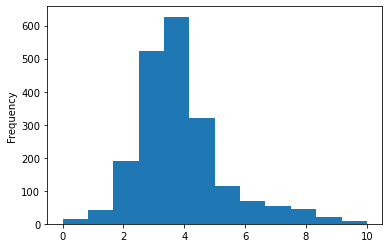

In [31]:
count['translation_rate'].plot(kind='hist',bins=12)

In [55]:
validation_result = pd.read_csv('../jupyter/output/validation_result_3.csv')
validation_result['seq'] = validation_result['seq'].map(lambda x:str(x)[5:12])

In [56]:
validation_result.shape

(1299, 3)

## データ分析

In [57]:
#ATGCの数を特徴量に追加
def base_count(row,base):
    count = 0
    for i in row['seq']:
        if i == base:
            count += 1
    return count

ATGC = 'ATGC'
for i in range(len(ATGC)):
    validation_result[ATGC[i]] = validation_result.apply(base_count,base=ATGC[i],axis=1)
    
validation_result    

,seq,translation_rate,predict,A,T,G,C
0,AAATGAG,8.096388,6.209352,4,1,2,0
1,AATCGTA,3.826014,3.615835,3,2,1,1
2,AATGTTT,3.606942,3.735422,2,4,1,0
3,AATTCTC,3.894314,2.958466,2,3,0,2
4,ACAACCA,2.250276,3.160979,4,0,0,3
5,ACATCAT,2.845964,2.980223,3,2,0,2
6,ACATTCT,4.305620,3.032602,2,3,0,2
7,ACCCAGA,3.422335,3.270357,3,0,1,3
8,ACGATTA,4.068502,3.776285,3,2,1,1
9,ACGGGAG,8.569086,8.395408,2,0,4,1


In [58]:
count_high = validation_result.sort_values(by='predict',ascending=False).iloc[:130]
count_low = validation_result.sort_values(by='predict',ascending=True).iloc[:130]

print(count_high.shape)
print(count_low.shape)

(130, 7)
(130, 7)


In [59]:
gomi[['A','T','G','C']].mean(axis=0)

NameError: name 'gomi' is not defined

In [60]:
count_high[['A','T','G','C']].mean(axis=0)

A    1.915385
T    1.192308
G    3.146154
C    0.746154
dtype: float64

([<matplotlib.patches.Wedge at 0x24dc5c04820>,
 [Text(-0.8333559411118918, 0.71799573495496, 'A'),
  Text(-0.8528654010678137, -0.694709009342356, 'T'),
  Text(0.9595136409637861, -0.537897362704465, 'G'),
  Text(0.3615140730311902, 1.0388972879935723, 'C')],
 [Text(-0.45455778606103187, 0.39163403724816, '27.4%'),
  Text(-0.4651993096733529, -0.3789321869140123, '17.0%'),
  Text(0.5233710768893378, -0.2933985614751627, '44.9%'),
  Text(0.19718949438064917, 0.5666712479964939, '10.7%')])

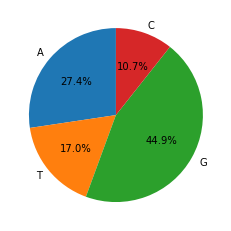

In [61]:
labels = ['A', 'T', 'G', 'C']
plt.pie(count_high[['A','T','G','C']].mean(axis=0).tolist(),labels = labels,
            autopct = '%1.1f%%', startangle = 90)

In [62]:
count_low[['A','T','G','C']].mean(axis=0)

A    1.461538
T    2.838462
G    0.361538
C    2.338462
dtype: float64

([<matplotlib.patches.Wedge at 0x24dc5a75dc0>,
 [Text(-0.6708922115667343, 0.871724520969266, 'A'),
  Text(-0.5804042375600827, -0.9344147478621574, 'T'),
  Text(0.8480485293057618, -0.7005809674422612, 'G'),
  Text(0.9538912160887869, 0.5478061225184103, 'C')],
 [Text(-0.3659412063091278, 0.47548610234687233, '20.9%'),
  Text(-0.31658412957822696, -0.5096807715611766, '40.5%'),
  Text(0.46257192507587, -0.38213507315032424, '5.2%'),
  Text(0.5203042996847927, 0.2988033395554965, '33.4%')])

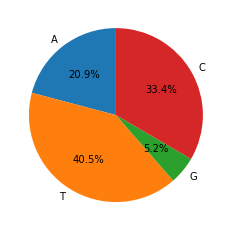

In [63]:
labels = ['A', 'T', 'G', 'C']
plt.pie(count_low[['A','T','G','C']].mean(axis=0).tolist(),labels = labels,
            autopct = '%1.1f%%', startangle = 90)

In [64]:
#RBSの位置による塩基含有率
for i in range(1,8):
    count_high[i] = count_high['seq'].map(lambda x:str(x)[i-1])
    
count_high.head(3)    

,seq,translation_rate,predict,A,T,G,C,1,2,3,4,5,6,7
112,TGAGGGT,7.975751,8.459445,1,2,4,0,T,G,A,G,G,G,T
9,ACGGGAG,8.569086,8.395408,2,0,4,1,A,C,G,G,G,A,G
464,GGGAGGA,8.076462,8.295196,2,0,5,0,G,G,G,A,G,G,A


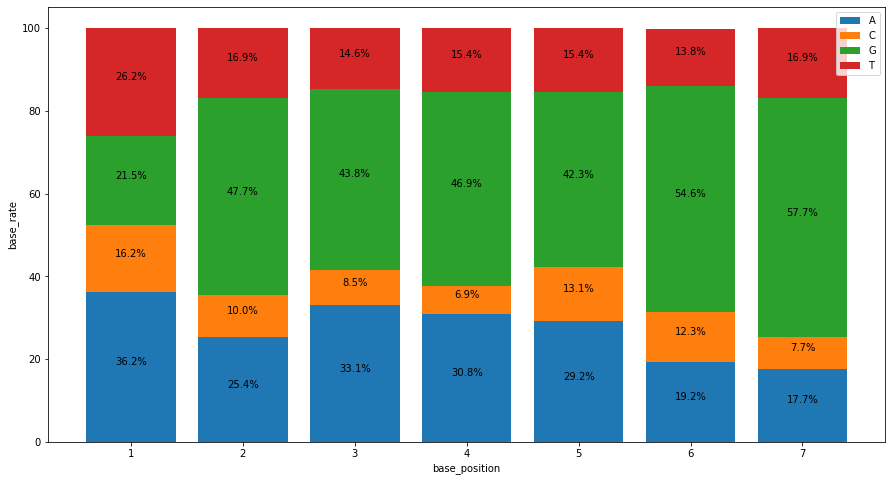

In [65]:
tmp_1 = round(count_high[1].value_counts(normalize=True).sort_index()*100,1)
tmp_2 = round(count_high[2].value_counts(normalize=True).sort_index()*100,1)
tmp_3 = round(count_high[3].value_counts(normalize=True).sort_index()*100,1)
tmp_4 = round(count_high[4].value_counts(normalize=True).sort_index()*100,1)
tmp_5 = round(count_high[5].value_counts(normalize=True).sort_index()*100,1)
tmp_6 = round(count_high[6].value_counts(normalize=True).sort_index()*100,1)
tmp_7 = round(count_high[7].value_counts(normalize=True).sort_index()*100,1)
tmp = pd.concat([tmp_1,tmp_2,tmp_3,tmp_4,tmp_5,tmp_6,tmp_7],axis=1)

fig, ax = plt.subplots(figsize=(15, 8))
for i in range(4):
    ax.bar(tmp.columns, 
           tmp.iloc[i], 
           bottom=tmp.iloc[:i].sum()
          )
    for j in range(1,8):
        plt.text(x=j, 
                 y=tmp.iloc[:i, j-1].sum()+(tmp.iloc[i, j-1]/2), 
                 s=f'{tmp.iloc[i, j-1]}%', 
                 ha='center', 
                 va='bottom'
                )
ax.set(xlabel='base_position', ylabel='base_rate')
ax.legend(tmp.index)
plt.show()

In [66]:
#RBSの位置による塩基含有率
for i in range(1,8):
    count_low[i] = count_low['seq'].map(lambda x:str(x)[i-1])
    
count_low.head(3)    

,seq,translation_rate,predict,A,T,G,C,1,2,3,4,5,6,7
300,CCCCAAC,1.083112,2.081414,2,0,0,5,C,C,C,C,A,A,C
1268,TCCTTTA,2.653716,2.106122,1,4,0,2,T,C,C,T,T,T,A
1203,CCCAATT,0.810330,2.258040,2,2,0,3,C,C,C,A,A,T,T


posx and posy should be finite values
posx and posy should be finite values


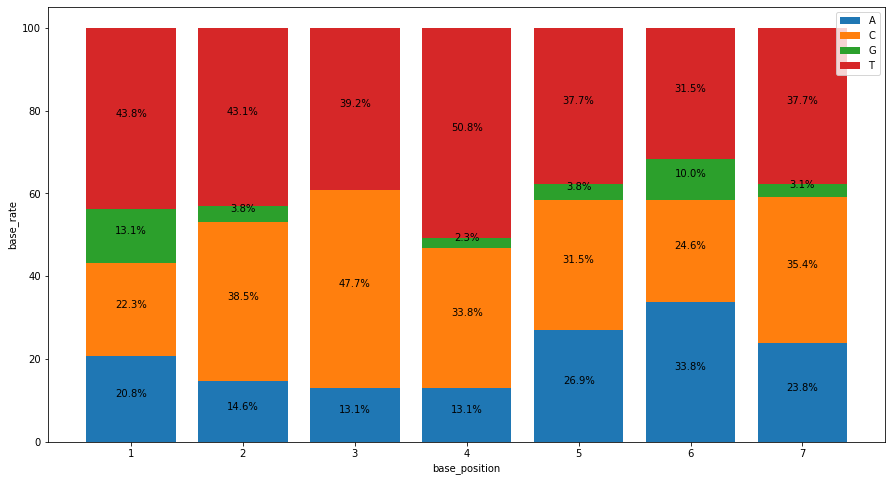

In [67]:
tmp_1 = round(count_low[1].value_counts(normalize=True).sort_index()*100,1)
tmp_2 = round(count_low[2].value_counts(normalize=True).sort_index()*100,1)
tmp_3 = round(count_low[3].value_counts(normalize=True).sort_index()*100,1)
tmp_4 = round(count_low[4].value_counts(normalize=True).sort_index()*100,1)
tmp_5 = round(count_low[5].value_counts(normalize=True).sort_index()*100,1)
tmp_6 = round(count_low[6].value_counts(normalize=True).sort_index()*100,1)
tmp_7 = round(count_low[7].value_counts(normalize=True).sort_index()*100,1)
tmp = pd.concat([tmp_1,tmp_2,tmp_3,tmp_4,tmp_5,tmp_6,tmp_7],axis=1)

fig, ax = plt.subplots(figsize=(15, 8))
for i in range(4):
    ax.bar(tmp.columns, 
           tmp.iloc[i], 
           bottom=tmp.iloc[:i].sum()
          )
    for j in range(1,8):
        plt.text(x=j, 
                 y=tmp.iloc[:i, j-1].sum()+(tmp.iloc[i, j-1]/2), 
                 s=f'{tmp.iloc[i, j-1]}%', 
                 ha='center', 
                 va='bottom'
                )
ax.set(xlabel='base_position', ylabel='base_rate')
ax.legend(tmp.index)
plt.show()

In [68]:
# #円グラフで塩基含有率
# fig, axes = plt.subplots(nrows=7,figsize=(5,30))
# for i in range(7):
#     labels = ['A', 'T', 'G', 'C']
#     axes[i].pie(count[i+1].value_counts().tolist(),labels = labels, colors = colors,
#             autopct = '%1.1f%%', startangle = 90)
#     axes[i].set_title(str(i+1))
    
# plt.show()    

In [69]:
count_high

,seq,translation_rate,predict,A,T,G,C,1,2,3,4,5,6,7
112,TGAGGGT,7.975751,8.459445,1,2,4,0,T,G,A,G,G,G,T
9,ACGGGAG,8.569086,8.395408,2,0,4,1,A,C,G,G,G,A,G
464,GGGAGGA,8.076462,8.295196,2,0,5,0,G,G,G,A,G,G,A
18,AGGGGAA,8.883779,8.216453,3,0,4,0,A,G,G,G,G,A,A
781,AAAGGAG,8.750334,8.196241,4,0,3,0,A,A,A,G,G,A,G
1022,TGGGAGA,9.197017,8.188407,2,1,4,0,T,G,G,G,A,G,A
921,AGAGCGG,6.649888,8.098940,2,0,4,1,A,G,A,G,C,G,G
615,TAGGGGT,8.987406,8.018682,1,2,4,0,T,A,G,G,G,G,T
522,AAGGAGT,7.128504,7.948675,3,1,3,0,A,A,G,G,A,G,T
167,CAGAGGA,8.059843,7.885980,3,0,3,1,C,A,G,A,G,G,A
